In [3]:
import pandas as pd
import sys
import os
import anndata as ad
import pandas as pd
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import numpy as np
# Import Scimap
import scimap as sm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import scanpy as sc
import anndata as ad

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



# Initial processing

In [79]:
full_df = pd.read_csv('P://afarkkila_microscopy//Data//CellCycle//analysis//relevant_files//qc_full_data_phenotyped_background_corr.csv',low_memory=False)
merged_df = full_df

In [80]:
# List of markers to process
markers = ['CyclinD1', 'p21', 'Geminin', 'pRb', 'pH3', 'CyclinB1','Ki67', 'PCNA','Ki67', 'PCNA','CyclinE',"MPM-2","Wee1","gH2Ax","pRPA"]
# Create a new DataFrame to store the processed results
processed_df = merged_df
for marker in markers:
    for imageid in merged_df['imageid'].unique():
        mask = (merged_df['imageid'] == imageid)
        adjusted_values = np.log1p(merged_df.loc[mask, marker])
new_full_df_nmm = processed_df

# GMM ALL MARKERS

In [81]:
# Compute 4 component GMM

# List of markers
markers = ['CyclinD1', 'p21', 'Geminin', 'pRb', 'pH3', 'CyclinB1','Ki67', 'PCNA','CyclinE',"MPM-2","Wee1","gH2Ax","pRPA"]# ,,'Ki67', 'PCNA','CyclinE',"MPM-2", 

# Loop through each marker
for marker in markers:
    status_col = f'{marker}_status_4'  # Generate a status column name based on the marker
    new_full_df_nmm[status_col] = np.nan  # Initialize the new column
    
    all_annotated_labels = []  # Create an empty list to hold all the annotated labels
    
    # Loop through each unique imageid
    for sample in new_full_df_nmm["imageid"].unique():
        subset_data = new_full_df_nmm[new_full_df_nmm["imageid"] == sample]
        data = subset_data[marker].values.reshape(-1, 1)

        # Initialize and fit the GMM with 4 components
        gmm = GaussianMixture(n_components=4, random_state=0)
        gmm.fit(data)
        labels = gmm.predict(data)
        
        label_df = pd.DataFrame({"label": labels, marker: subset_data[marker].values})
        medians = label_df.groupby("label")[marker].median().sort_values().index

        # Map the labels to the descriptive categories
        status_labels = ["bg", "low", "med", "hi"]
        label_mapping = {medians[i]: status_labels[i] for i in range(len(medians))}
        annotated_labels = [label_mapping[label] for label in labels]
        all_annotated_labels.extend(annotated_labels)

    # Assign the annotated labels back to the corresponding status column in the DataFrame
    new_full_df_nmm[status_col] = all_annotated_labels

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\subprocess.py", line 1436, in _execute_child
    hp, h

In [82]:
# Compute 3 component GMM
for marker in markers:
    status_col = f'{marker}_status_3'  # Generate a status column name based on the marker
    new_full_df_nmm[status_col] = np.nan  # Initialize the new column
    all_annotated_labels = []  # Create an empty list to hold all the annotated labels
    
    # Loop through each unique imageid
    for sample in new_full_df_nmm["imageid"].unique():
        subset_data = new_full_df_nmm[new_full_df_nmm["imageid"] == sample]
        data = subset_data[marker].values.reshape(-1, 1)

        # Initialize and fit the GMM with 4 components
        gmm = GaussianMixture(n_components=3, random_state=0)
        gmm.fit(data)
        labels = gmm.predict(data)
        
        label_df = pd.DataFrame({"label": labels, marker: subset_data[marker].values})
        medians = label_df.groupby("label")[marker].median().sort_values().index

        # Map the labels to the descriptive categories
        status_labels = ["bg", "low-med","hi"]
        label_mapping = {medians[i]: status_labels[i] for i in range(len(medians))}
        annotated_labels = [label_mapping[label] for label in labels]
        all_annotated_labels.extend(annotated_labels)

    # Assign the annotated labels back to the corresponding status column in the DataFrame
    new_full_df_nmm[status_col] = all_annotated_labels

In [85]:
# VISUALIZE LABELS OVER IMAGE
marker_list_with_DNA = ['DNA1',
       'CyclinE', 'DNA2', 'pChk1', 'DNA3', 'Tcf1', 'pRb', 'CyclinB1', 'DNA4',
       'CyclinA', 'CD11c', 'p27', 'Vimentin', 'DNA5', 'TIM-3', 'PanCK', 'Wee1',
       'DNA6', 'CD163', 'CyclinD1', 'p21', 'DNA7', 'pH3', 'CD45', 'MPM-2',
       'DNA8', 'pRPA', 'pStat1', 'CD20', 'DNA9', 'PCNA', 'Geminin', 'gH2Ax',
       'DNA10', 'CD4_1', 'aSMA', 'CD8a', 'DNA11', 'Iba1', 'PAX8', 'PD-1',
       'DNA12', 'Ki67', 'FOX-P3', 'CD31','DNA13', 'CD4_2', 'FAP', 'NKG2a'] 

data = new_full_df_nmm[marker_list_with_DNA]
meta = new_full_df_nmm.drop(columns=marker_list_with_DNA)
#Remove DNA channels
hoechst_columns = [col for col in data.columns if "DNA" in col]
data.drop(columns=hoechst_columns, inplace=True)
columns = data.columns
data = np.log1p(data[data.columns])
adata = ad.AnnData (data)
adata.obs = meta
directory_img = "P://afarkkila_microscopy//Data//CellCycle//batch1_cellcycle4//cylinter//tif//"
sample = "S073_iOme1"
file_image_dir = directory_img + sample + ".ome.tif"
sample_data=adata[adata.obs["imageid"]==sample]
sm.pl.image_viewer(file_image_dir, sample_data, overlay = 'CyclinE_status_4', channel_names = marker_list_with_DNA,x_coordinate="X_centroid",y_coordinate="Y_centroid", point_size=30)


C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_17756\44668190.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning:

Transforming to str index.



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# VISUALIZE SINGLE IMAGE IN PLOT

# Create a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=values120, x='X_centroid', y='Y_centroid', hue='pRb_status', palette='Set1',s=0.6)
values120 =  new_full_df[new_full_df["imageid"] == "S005_iOme"]
# Customize the plot
plt.title('Scatter Plot of X_centroid vs Y_centroid colored by p21_status')
plt.xlabel('X_centroid')
plt.ylabel('Y_centroid')
plt.legend(title='p21_status')
plt.grid(True)
plt.show()

df_melted = pd.melt(new_full_df_nmm, id_vars=['imageid', 'pRb'], value_vars=['pRb_status', 'pRb_status_3'],
                    var_name='Status Type', value_name='Status')


# scoring BASED ON GMM 

## continuous scores

In [86]:
# Identify columns that contain '_status' in their names
new_full_df = new_full_df_nmm
status_columns = [col for col in new_full_df_nmm.columns if '_status' in col]
marker_columns = [col.replace('_status', '') for col in status_columns]

In [87]:
#Select the best ncomponent model and assign scores and final status columns based on that
marker_columns_low = []
marker_columns_med = ['p21','Ki67','PCNA']
marker_columns_hi=[]#

for marker in marker_columns_low:
    marker_status_col = marker + '_status_3'
    marker_score_col = marker + '_score'
    
    # Calculate the marker score using numpy.where
    new_full_df_nmm[marker_score_col] = np.where(new_full_df_nmm[marker_status_col].isin(['bg']), 0, new_full_df[marker])
    status_name = marker + "_status"
    new_full_df_nmm[status_name]  = np.where(new_full_df_nmm[marker_status_col].isin(['bg']), "bg", new_full_df_nmm[marker_status_col]) 

for marker in marker_columns_med:
    marker_status_col = marker + '_status_3'
    marker_score_col = marker + '_score'
    
    # Calculate the marker score using numpy.where
    new_full_df_nmm[marker_score_col] = np.where(new_full_df_nmm[marker_status_col].isin(['bg']), 0, new_full_df[marker])
    status_name = marker + "_status"
    new_full_df_nmm[status_name]  = np.where(new_full_df_nmm[marker_status_col].isin(['bg']), "bg", new_full_df_nmm[marker_status_col]) 

for marker in marker_columns_hi:
    marker_status_col = marker + '_status_3'
    marker_score_col = marker + '_score'
    # Calculate the marker score using numpy.where
    new_full_df_nmm[marker_score_col] = np.where(new_full_df_nmm[marker_status_col].isin(['bg', 'low-med']), 0, new_full_df[marker])
    status_name = marker + "_status"
    new_full_df_nmm[status_name]  = np.where(new_full_df_nmm[marker_status_col].isin(['bg', 'low-med']), "bg", new_full_df_nmm[marker_status_col]) 

#4GMM markers
marker_columns_low = ["CyclinE",'Geminin']
marker_columns_med = ['pRb','CyclinD1',"pRPA",'pH3',"Wee1"]
marker_columns_hi = []
for marker in marker_columns_low:
    marker_status_col = marker + '_status_4'
    marker_score_col = marker + '_score'
    status_name = marker + "_status"
    new_full_df_nmm[status_name]  = np.where(new_full_df_nmm[marker_status_col].isin(['bg']), "bg", new_full_df_nmm[marker_status_col]) 
    # Calculate the marker score using numpy.where
    new_full_df_nmm[marker_score_col] = np.where(new_full_df_nmm[marker_status_col].isin(['bg']), 0, new_full_df[marker])

for marker in marker_columns_med:
    marker_status_col = marker + '_status_4'
    marker_score_col = marker + '_score'
    
    # Calculate the marker score using numpy.where
    new_full_df_nmm[marker_score_col] = np.where(new_full_df_nmm[marker_status_col].isin(['bg',"low"]), 0, new_full_df[marker])
    status_name = marker + "_status"
    new_full_df_nmm[status_name]  = np.where(new_full_df_nmm[marker_status_col].isin(['bg',"low"]), "bg", new_full_df_nmm[marker_status_col]) 

for marker in marker_columns_hi:
    marker_status_col = marker + '_status_4'
    marker_score_col = marker + '_score'
    status_name = marker + "_status"
    # Calculate the marker score using numpy.where
    new_full_df_nmm[marker_score_col] = np.where(new_full_df_nmm[marker_status_col].isin(['bg', 'low',"med"]), 0, new_full_df[marker])
    new_full_df_nmm[status_name]  = np.where(new_full_df_nmm[marker_status_col].isin(['bg', 'low',"med"]), "bg", new_full_df_nmm[marker_status_col]) 


In [72]:
tumor_df = pd.read_csv("E:\\cell_cycle_scores_and_status.csv")

In [78]:
tumor_df["pH3_status_4"]==tumor_df["pH3_status"]

0           True
1           True
2           True
3           True
4           True
           ...  
9407691     True
9407692     True
9407693    False
9407694     True
9407695     True
Length: 9407696, dtype: bool

## Adjustments based on experimental assessments

In [89]:
tumor_df = new_full_df_nmm

In [91]:
#CCNE (set to 0/ bg in those samples where no signal was found)

ccne_data = {
    'S005_iOme': -1,
    'S050_iAdn': -1,
    'S057_iOme': -1,
    'S065_iOme': -1,
    'S072_iOme': 0,
    'S081_iOme': -1,
    'S073_iOme1': 1,
    'S083_iOme1': 1,
    'S084_iOme2': 1,
    'S088_iOme': 1,
    'S091_iOme1': -1,
    'S098_iOme': -1,
    'S100_iOme': 1,
    'S107_iOme': 1,
    'S110_iTubR': 1,
    'S112_iOme': -1,
    'S113_iOme': -1,
    'S118_iOme': -1,
    'S120_iOme': 0,
    'S121_iOme': -1,
    'S123_iOme': 0,
    'S130_iOme': 1,
    'S131_iOme': 1,
    'S188_iOme': -1,
    'S195_iOme1': 1,
    'S197_iOme': -1,
    'S225_iOme': 1,
    'S268_iOme': 1
}
for index, row in tumor_df.iterrows():
    slide = row['imageid']
    if slide in ccne_data:
        ccne_value = ccne_data[slide]
        if ccne_value ==-1:
            tumor_df.at[index, 'CyclinE_score'] = 0
            tumor_df.at[index, 'CyclinE_status'] = "bg"


In [92]:
# (set to 0/ bg in those samples where no signal was found)

prpa_dict = {
    'S005_iOme': 1, 'S050_iAdn': 1, 'S057_iOme': 1, 'S065_iOme': 1, 
    'S072_iOme': 0, 'S081_iOme': 0, 'S073_iOme1': 1, 'S083_iOme1': 0, 
    'S084_iOme2': 0, 'S088_iOme': -1, 'S091_iOme1': -1, 'S098_iOme': 1, 
    'S100_iOme': 1, 'S107_iOme': 0, 'S110_iTubR': -1, 'S112_iOme': -1, 
    'S113_iOme': 1, 'S118_iOme': 0, 'S120_iOme': 0, 'S121_iOme': 0, 
    'S123_iOme': 0, 'S130_iOme': 1, 'S131_iOme': 0, 'S188_iOme': 1, 
    'S195_iOme1': 0, 'S197_iOme': 1, 'S225_iOme': 0, 'S268_iOme': 1
}
for index, row in tumor_df.iterrows():
    slide = row['imageid']
    if slide in prpa_dict:
        prpa_value = prpa_dict[slide]
        if prpa_value == -1:
            tumor_df.at[index, 'pRPA_score'] = 0
            tumor_df.at[index, 'pRPA_status'] = "bg"

In [93]:
#SCALE SCORES FROM 0-1
from sklearn.preprocessing import MaxAbsScaler
import pandas as pd
def minmax_scale_group(df, score_cols):
    # Iterate through each score column
    for col in score_cols:
        # Select non-zero values
        non_zero_values = df[col] != 0
        if non_zero_values.any():
            # Scale only the non-zero values
            scaler = MaxAbsScaler()
            df.loc[non_zero_values, col] = scaler.fit_transform(df.loc[non_zero_values, col].values.reshape(-1, 1)).flatten()
    return df
# Assuming `new_full_df_nmm` is your DataFrame
score_columns = [col for col in tumor_df.columns if '_score' in col]
# Apply the function group by group
tumor_df = tumor_df.groupby('imageid').apply(lambda group: minmax_scale_group(group, score_columns)).reset_index(drop=True)

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_17756\3017448094.py:17: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



In [94]:
#REPLACE WITH NUMBERS THE STATUS_MAPPING 
status_mapping = {
    'bg': 0,
    'low': 0.5,
    'low-med': 1,
    'med': 1,
    'hi': 2
}

# List of columns ending with '_status'
status_columns = [col for col in tumor_df.columns if col.endswith('_status')]

# Apply the mapping to the relevant columns
for col in status_columns:
    tumor_df[col] = tumor_df[col].replace(status_mapping)

In [96]:
tumor_df['combined_cc_status'] = tumor_df[["p21_status","CyclinD1_status",'CyclinE_status',"pRb_status","Geminin_status","pH3_status",'pRPA_status','Wee1_status']].apply(tuple, axis=1)

In [101]:
scores_status = tumor_df[['CellID','Y_centroid','X_centroid','imageid', 'combined_cc_status',
 'p21_score',
 'p21_status',
 'Ki67_score',
 'Ki67_status',
 'PCNA_score',
 'PCNA_status',
 'CyclinE_status',
 'CyclinE_score',
 'Geminin_status',
 'Geminin_score',
 'pRb_score',
 'pRb_status',
 'CyclinD1_score',
 'CyclinD1_status',
 'pRPA_score',
 'pRPA_status',
 'pH3_score',
 'pH3_status',
 'Wee1_score',
 'Wee1_status']]

scores_status.to_csv("P:\\afarkkila_microscopy\\Data\\CellCycle\\analysis\\relevant_files\\cell_cycle_scores_and_status.csv")

## Score correlation visualization

In [ ]:
# Melt the DataFrame to long format for easier plotting
melted_df = pd.melt(tumor_df, id_vars=['imageid'], value_vars=status_columns,
                    var_name='Marker', value_name='Score')
g = sns.FacetGrid(melted_df, hue="imageid", col="Marker", col_wrap=5, sharex=False)
g.map(sns.kdeplot, "Score", alpha=.4)
g.set(xlim=(0.2, 0.7))

g.add_legend()

plt.show()

In [19]:
#REPLACE WITH NUMBERS THE STATUS_MAPPING 
status_mapping = {
    'bg': 0,
    'low': 0.5,
    'low-med': 1,
    'med': 1,
    'hi': 2
}

# List of columns ending with '_status'
status_columns = [col for col in tumor_df.columns if col.endswith('_status')]

# Apply the mapping to the relevant columns
for col in status_columns:
    tumor_df[col] = tumor_df[col].replace(status_mapping)

In [23]:
status_columns = [col for col in tumor_df.columns if col.endswith('_status')]


In [24]:
status_columns

['p21_status',
 'Ki67_status',
 'PCNA_status',
 'CyclinE_status',
 'Geminin_status',
 'pRb_status',
 'CyclinD1_status',
 'pRPA_status',
 'pH3_status',
 'Wee1_status']

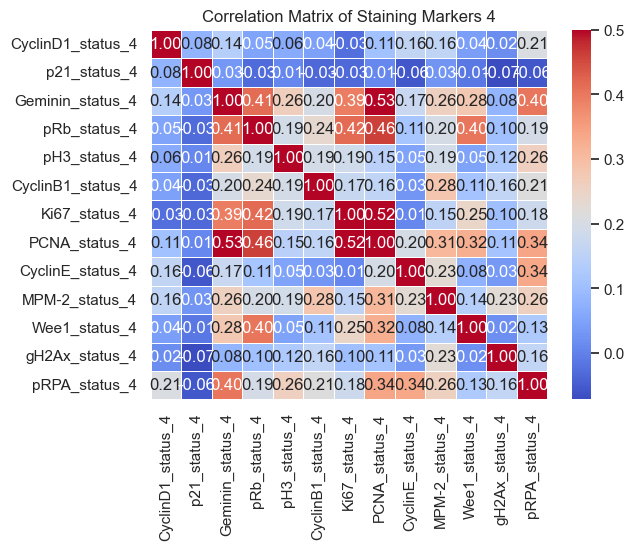

In [20]:
correlation_matrix = tumor_df[status_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmax=0.5)
plt.title('Correlation Matrix of Staining Markers 4')
plt.show()

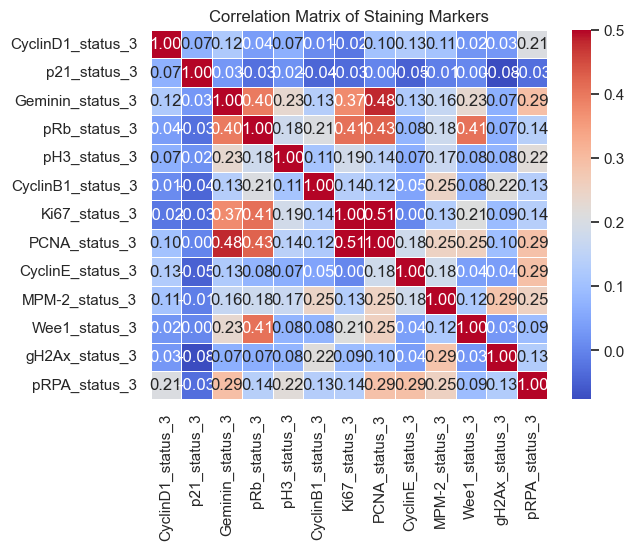

In [18]:
correlation_matrix = tumor_df[status_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmax=0.5)
plt.title('Correlation Matrix of Staining Markers 3')
plt.show()

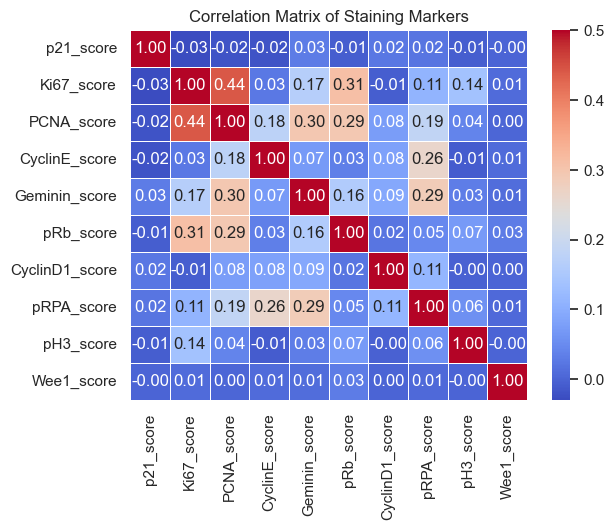

In [11]:
correlation_matrix = tumor_df[score_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmax=0.5)
plt.title('Correlation Matrix of Staining Markers')
plt.show()

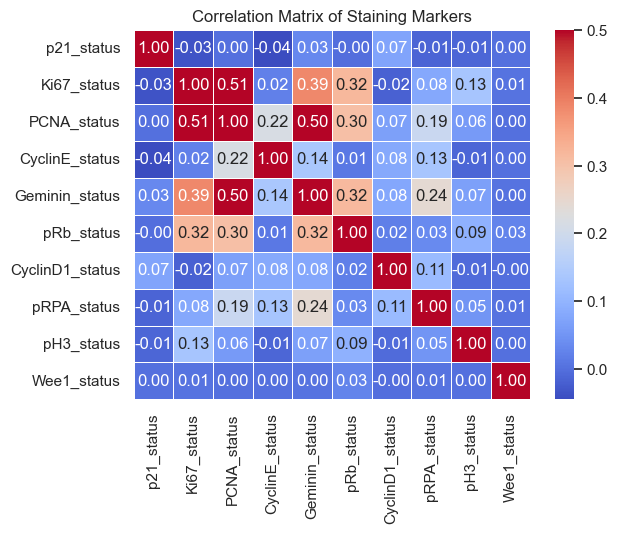

In [10]:
correlation_matrix = tumor_df[status_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmax=0.5)
plt.title('Correlation Matrix of Staining Markers')
plt.show()

# Category establishment

In [25]:
status_columns = new_full_df_nmm.filter(like='status', axis=1)
status_columns = status_columns[[col for col in status_columns.columns if col.endswith('status')]]
tumor_df = new_full_df_nmm[new_full_df_nmm["phenotype"]=="Tumor"]
status_columns.drop(["funct_status","pheno_funct_status"],axis=1)
status_columns = [col for col in tumor_df.columns if col.endswith('_status')]

NameError: name 'new_full_df_nmm' is not defined

In [26]:
status_mapping = {
    'bg': 0,
    'low': 0.5,
    'low-med': 1,
    'med': 1,
    'hi': 2
}

# List of columns ending with '_status'
status_columns = [col for col in tumor_df.columns if col.endswith('_status')]

# Apply the mapping to the relevant columns
for col in status_columns:
    tumor_df[col] = tumor_df[col].replace(status_mapping)

classification_data = tumor_df[status_columns]
#classification_data = classification_data.drop(["pheno_funct_status","funct_status"],axis=1)

In [49]:
#SUBSETTING CLASSIFICATION DATA
classification_data = tumor_df[['p21_status', 'Geminin_status',
        'CyclinE_status', 'pRb_status', 'CyclinD1_status',
       'Ki67_status', 'PCNA_status','pRPA_status',
       'pH3_status', 'Wee1_status']]
status_columns = classification_data.columns

In [40]:
tumor_df["pH3_status"].value_counts()

0    4256699
2      16480
Name: pH3_status, dtype: int64

In [41]:
# Apply the classification rules directly to the classification_data DataFrame
classification_data['manual_clusters']="not_background"
classification_data['manual_clusters'] = classification_data.apply(
    lambda row: (
        'background' if all(row[col] == 0 for col in status_columns) else
        'arrested' if row['p21_status'] == 2 else
        'M' if row['pH3_status'] == 2 else
        'G1_p21+' if row['CyclinD1_status'] == 2 and row['Geminin_status'] == 0 and row['p21_status'] == 1 else
        'G1' if row['manual_clusters'] == 'not_background' and row['CyclinD1_status'] == 2 and row['Geminin_status'] != 0 and row['pRb_status'] !=2 else
        'G1_low' if row['manual_clusters'] == 'not_background' and row['CyclinD1_status'] == 1 and row['Geminin_status'] == 0 and row['pRb_status'] ==0 else
        'G1_p21+' if row['manual_clusters'] == 'G1_low' and row['p21_status'] == 1 else

        'S_p21+' if row['manual_clusters']  == 'not_background' and  row['pRb_status'] in [1,2] and row['p21_status'] == 1 else
        'S' if row['manual_clusters'] == 'not_background' and row['pRb_status']==2 else 
        'S_low' if row['manual_clusters'] == 'not_background' and row['pRb_status'] == 1 else

        'G2_p21+' if row['manual_clusters']  == 'not_background' and row['Geminin_status'] in [0.5,1,2] and row['p21_status'] == 1 else
        'G2' if row['manual_clusters'] == 'not_background' and row['Geminin_status'] == 2 else
        'G2_low' if row['manual_clusters'] == 'not_background' and row['Geminin_status'] in [0.5,1] else

        'arrested_low' if row['manual_clusters'] == 'not_background' and row['p21_status'] == 1 and all(row[col] == 0 for col in status_columns if col != 'p21_status') else
        'p21_low_with_other_expression' if row['manual_clusters'] == 'not_background' and row['p21_status'] == 1 else

        #'G1_low' if row['manual_clusters'] == 'not_background' and row['CyclinD1_status'] == 1 and row['Geminin_status'] == 1 and all(row[col] == 0 for col in status_columns if col  not in ['Geminin_status', 'CyclinD1_status',"pH3"]) else
        #'G1_low' if row['manual_clusters'] == 'not_background' and row['CyclinD1_status'] == 1 and all(row[col] == 0 for col in status_columns if col  not in ['CyclinD1_status',"pH3"]) else

        row['manual_clusters']  # Default to current value if none of the conditions are met
    ),
    axis=1
)
tumor_df["manual_clusters"] = classification_data["manual_clusters"]

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_11716\2345456642.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_11716\2345456642.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_11716\2345456642.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [42]:
tumor_df["manual_clusters"].value_counts()

G2_low                           2166012
not_background                    690258
background                        671345
G2_p21+                           230301
S_low                             125908
G2                                 76759
G1_low                             69811
p21_low_with_other_expression      66877
arrested_low                       62175
arrested                           50677
S_p21+                             18239
G1                                 16866
M                                  16392
S                                  10521
G1_p21+                             1038
Name: manual_clusters, dtype: int64

In [123]:
classification_data = tumor_df[status_columns]
#classification_data = classification_data.drop(["pheno_funct_status","funct_status","CyclinE_status"],axis=1)
status_columns = classification_data.columns
classification_data["manual_clusters"] = tumor_df["manual_clusters"]

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_20624\698888245.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
marker_list_with_DNA = ['DNA1',
       'CyclinE', 'DNA2', 'pChk1', 'DNA3', 'Tcf1', 'pRb', 'CyclinB1', 'DNA4',
       'CyclinA', 'CD11c', 'p27', 'Vimentin', 'DNA5', 'TIM-3', 'PanCK', 'Wee1',
       'DNA6', 'CD163', 'CyclinD1', 'p21', 'DNA7', 'pH3', 'CD45', 'MPM-2',
       'DNA8', 'pRPA', 'pStat1', 'CD20', 'DNA9', 'PCNA', 'Geminin', 'gH2Ax',
       'DNA10', 'CD4_1', 'aSMA', 'CD8a', 'DNA11', 'Iba1', 'PAX8', 'PD-1',
       'DNA12', 'Ki67', 'FOX-P3', 'CD31', 'DNA13', 'CD4_2', 'FAP', 'NKG2a']#

data = tumor_df[marker_list_with_DNA]
meta = tumor_df.drop(columns=marker_list_with_DNA)
#Remove DNA channels
hoechst_columns = [col for col in data.columns if "DNA" in col]
data.drop(columns=hoechst_columns, inplace=True)
columns = data.columns
data = np.log1p(data[data.columns])
adata = ad.AnnData (data)
adata.obs = meta

directory_img = "P://afarkkila_microscopy//Data//CellCycle//batch1_cellcycle4//cylinter//tif//"
sample = "S073_iOme1"
file_image_dir = directory_img + sample + ".ome.tif"
sample_data=adata[adata.obs["imageid"]==sample]
sm.pl.image_viewer(file_image_dir, sample_data, overlay = 'manual_clusters', channel_names = marker_list_with_DNA,x_coordinate="X_centroid",y_coordinate="Y_centroid", point_size=30)


C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_11716\2808700857.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning:

Transforming to str index.

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:801: UserWarning:


AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer




# Radar chart

In [ ]:
import pandas as pd
import plotly.express as px

# Assume tumor_df is your dataset

# Step 1: Create the 'big_phases' column based on 'manual_cluster'
tumor_df['big_phases'] = np.where(tumor_df['manual_clusters'].str.contains('G1'), 'G1',
                        np.where(tumor_df['manual_clusters'].str.contains('S'), 'S',
                        np.where(tumor_df['manual_clusters'].str.contains('M'), 'M',
                        np.where(tumor_df['manual_clusters'].str.contains('G2'), 'G2',
                        np.where(tumor_df['manual_clusters'].str.contains('arrested'), 'arrested', np.nan)))))

# Step 2: Drop rows where 'big_phases' is NaN
tumor_df = tumor_df.dropna(subset=['big_phases'])

# Step 3: Initialize an empty DataFrame for radar data
radar_data = pd.DataFrame()

# Step 4: Loop through each unique imageid and calculate counts for 'big_phases'
for imageid in tumor_df['imageid'].unique():
    # Filter the data for this particular imageid
    sample = tumor_df[tumor_df["imageid"] == imageid]
    
    # Count occurrences of each 'big_phases' value
    cluster_counts = sample['big_phases'].value_counts()
    
    # Ensure all phases are represented (G1, S, G2, M, arrested) even if their count is 0
    cluster_counts = cluster_counts.reindex(["G1", "S", "G2", "M", "arrested"], fill_value=0)
    
    # Add to the radar_data DataFrame
    radar_data = radar_data.append(pd.DataFrame({
        'r': cluster_counts.values,  # Counts of each cluster
        'theta': cluster_counts.index,  # Cluster names
        'imageid': imageid  # Add imageid for grouping
    }))

# Step 5: Create radar chart using Plotly Express, grouping by imageid to have separate lines
fig = px.line_polar(radar_data, r='r', theta='theta', color='imageid', line_close=True)

# Step 6: Show the plot
fig.show()



## Check unlabeled data

In [389]:
# CHECK UNCLUSTERED DATA
# Combine marker columns into a tuple
filtered_data = classification_data
filtered_data['combination'] = filtered_data[["p21_status","CyclinD1_status", 'CyclinE_status',"pRb_status","Geminin_status","pH3_status",'pRPA_status','Wee1_status']].apply(tuple, axis=1)

# Step 2: Count the Frequency of Each Combination
combination_counts = filtered_data['combination'].value_counts()

# Step 3: Display the Results
# Convert the result to a DataFrame for better display
combination_counts_df = combination_counts.reset_index()
combination_counts_df.columns = ['Combination', 'Count']

# Sort by count to see the most and least common combinations
combination_counts_df = combination_counts_df.sort_values(by='Count', ascending=False)


# Calculate the total number of rows
total_rows = len(classification_data)

# Calculate the percentage of each combination
combination_counts_df['Percentage'] = (combination_counts_df['Count'] / total_rows) * 100

# Filter combinations that make up more than 1% of the dataset
significant_combinations_df = combination_counts_df[combination_counts_df['Percentage'] > 5]

# Sort by count to see the most and least common combinations
significant_combinations_df = significant_combinations_df.sort_values(by='Count', ascending=False)

# Display the result
print(significant_combinations_df)

       Combination    Count  Percentage
0  (0, 0, 0, 1, 0)  1493700   34.955241
1  (0, 0, 0, 0, 0)   685384   16.039206
2  (0, 1, 0, 1, 0)   301814    7.062985


In [ ]:
# Filter combinations that make up more than 1% of the dataset
significant_combinations_df = combination_counts_df[combination_counts_df['Percentage'] > 0.1]

# Sort by count to see the most and least common combinations
significant_combinations_df = significant_combinations_df.sort_values(by='Count', ascending=False)

# Display the result
print(significant_combinations_df)

In [397]:
filtered_data = classification_data
filtered_data = filtered_data[["p21_status","CyclinD1_status","pRb_status","Geminin_status","pH3_status","manual_clusters","imageid"]]
filtered_data['combination'] = filtered_data[["p21_status","CyclinD1_status","pRb_status","Geminin_status","pH3_status"]].apply(tuple, axis=1)

tumor_df["combination"] = filtered_data["combination"]

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_5536\2213588298.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0          (0, 0, 0, 0, 0)
1          (0, 0, 2, 2, 0)
2          (0, 0, 0, 0, 0)
3          (1, 0, 2, 2, 0)
4          (0, 0, 0, 0, 0)
                ...       
9407687    (0, 1, 0, 1, 0)
9407688    (1, 1, 0, 1, 1)
9407690    (0, 0, 0, 0, 0)
9407694    (0, 1, 0, 1, 0)
9407695    (1, 1, 0, 1, 0)
Name: combination, Length: 4273179, dtype: object

# barplots

In [188]:
statist['G1', 'G1_low','late G1', 'late G1_low','S', 'S_low', 
       'early G2', 'early G2_low', 'late G2', 'late G2_low', 'M',
       'arrested', 'arrested_low','p21_low_with_other_expression',
       'not_background','background']

Index(['G1', 'G1_low', 'M', 'S', 'S_low', 'arrested', 'arrested_low',
       'background', 'early G2', 'early G2_low', 'late G1', 'late G1_low',
       'late G2', 'late G2_low', 'not_background',
       'p21_low_with_other_expression'],
      dtype='object', name='manual_clusters')

In [227]:
tumor_scores["manual_clusters"]= tumor_df["manual_clusters"]
tumor_scores["imageid"]= tumor_df["imageid"]

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_5536\2882030462.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_5536\2882030462.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1700x1500 with 0 Axes>

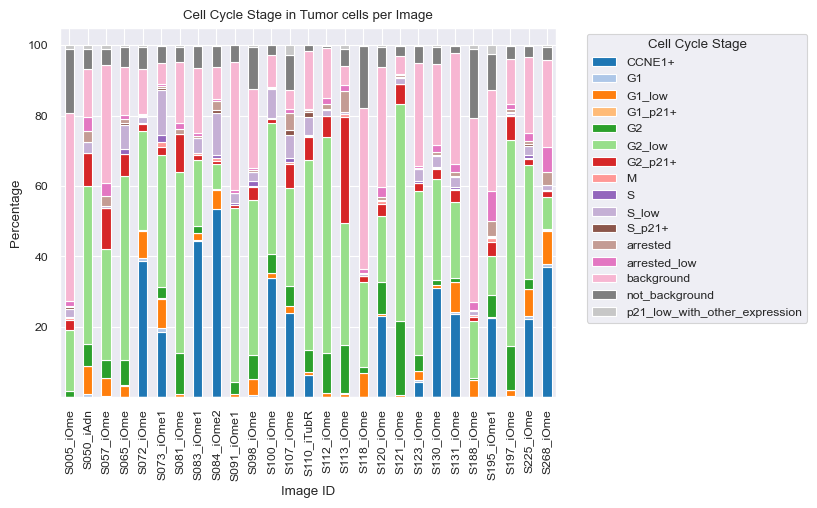

In [164]:
sns.set_theme("paper")
statist = tumor_df.groupby(['imageid'])["manual_clusters"].value_counts(normalize=True).unstack().fillna(0) * 100
#statist = statist[['G1', 'G1_low','late G1', 'late G1_low','S', 'S_low', 
       #'early G2', 'early G2_low', 'late G2', 'late G2_low', 'M',
       #'arrested', 'arrested_low','p21_low_with_other_expression',
     #  'not_background','background']]
# Optional: Order the data based on a specific cell cycle stage, e.g., 'G1'
#order = statist.sort_values(by=[1], ascending=False).index

# Reorder the dataframe
#statist = statist.loc[order]
palette = sns.color_palette("tab20", n_colors=len(statist.columns))

# Plotting
plt.figure(figsize=(17, 15))
ax = statist.plot(kind='bar', stacked=True,color=palette)
plt.title('Cell Cycle Stage in Tumor cells per Image')
plt.xlabel('Image ID')
plt.ylabel('Percentage')
ax.legend(title='Cell Cycle Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1700x1500 with 0 Axes>

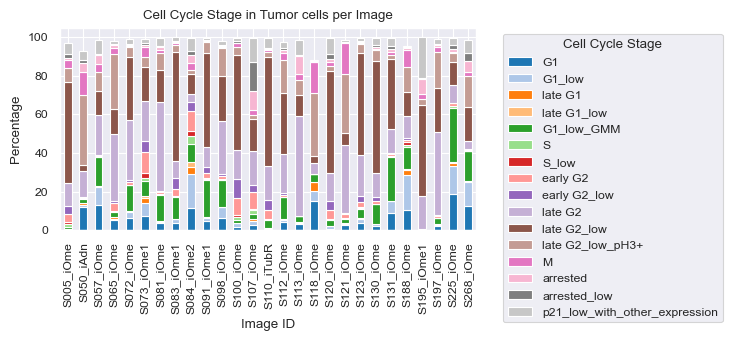

In [399]:
#plot without unknown categories
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme("paper")

# Exclude 'not_background' and 'background' from the DataFrame
filtered_df = tumor_df[~tumor_df['manual_clusters'].isin(['not_background', 'background'])]

# Calculate statistics
statist = filtered_df.groupby(['imageid'])["manual_clusters"].value_counts(normalize=True).unstack().fillna(0) * 100

# Reorder the DataFrame (if necessary)
statist = statist[['G1', 'G1_low','late G1', 'late G1_low', "G1_low_GMM", 'S', 'S_low', 
                   'early G2', 'early G2_low', 'late G2', 'late G2_low', 'late G2_low_pH3+','M',
                   'arrested', 'arrested_low','p21_low_with_other_expression']]

# Plotting
palette = sns.color_palette("tab20", n_colors=len(statist.columns))
plt.figure(figsize=(17, 15))
ax = statist.plot(kind='bar', stacked=True, color=palette)
plt.title('Cell Cycle Stage in Tumor cells per Image')
plt.xlabel('Image ID')
plt.ylabel('Percentage')
ax.legend(title='Cell Cycle Stage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [372]:
classification_data["imageid"] = tumor_df["imageid"]
score_columns = [col for col in classification_data.columns if col.endswith('_status')]
needed_columns = ['imageid', 'manual_clusters'] + score_columns
subset_df = classification_data[needed_columns]

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_5536\315242596.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
median_scores = subset_df.groupby(['imageid', 'manual_clusters'])[score_columns].median().reset_index()
median_scores_pivot = median_scores.pivot(index='imageid', columns='manual_clusters', values=score_columns)
median_scores["imageid_manual_cluster"] = median_scores["imageid"]+"_"+ median_scores["manual_clusters"]




In [387]:
combination_counts = filtered_data.groupby(['imageid', 'manual_clusters'])[score_columns].value_counts()


In [373]:
# Step 2: Count the Frequency of Each Combination

# Step 3: Display the Results
# Convert the result to a DataFrame for better display
combination_counts_df = combination_counts.reset_index()
combination_counts_df.columns = ['Combination', 'Count']

# Sort by count to see the most and least common combinations
combination_counts_df = combination_counts_df.sort_values(by='Count', ascending=False)

In [354]:
pivot_table = median_scores.pivot_table(index='imageid_manual_cluster', values=score_columns)


In [375]:
median_scores

,imageid,manual_clusters,Geminin_status,p21_status,pH3_status,pRb_status,CyclinD1_status,imageid_manual_cluster
0,S005_iOme,G1,1.0,0.0,0.0,0.0,2.0,S005_iOme_G1
1,S005_iOme,G1_low,0.0,0.0,0.0,0.0,1.0,S005_iOme_G1_low
2,S005_iOme,G1_low_GMM,1.0,0.0,0.0,0.0,1.0,S005_iOme_G1_low_GMM
3,S005_iOme,M,1.0,0.0,2.0,0.0,0.0,S005_iOme_M
4,S005_iOme,M_low,0.0,0.0,1.0,0.0,0.0,S005_iOme_M_low
...,...,...,...,...,...,...,...,...
506,S268_iOme,late G2,2.0,0.0,1.0,0.0,1.0,S268_iOme_late G2
507,S268_iOme,late G2_low,1.0,0.0,0.0,0.0,0.0,S268_iOme_late G2_low
508,S268_iOme,late G2_low_pH3+,1.0,0.0,1.0,0.0,1.0,S268_iOme_late G2_low_pH3+
509,S268_iOme,not_background,0.0,0.0,1.0,0.0,1.0,S268_iOme_not_background


# heatmap

In [351]:
tumor_df.to_csv("L://Projects//4_CellCycle//tumor_with_manualclusters.csv")

In [ ]:
sns.set_theme("poster")
g = sns.clustermap(pivot_table, figsize=(18,50), annot=False, col_cluster= False, cmap='viridis', vmin=0, vmax=2, yticklabels = True)
x0, _y0, _w, _h = g.cbar_pos
g.ax_cbar.set_position([x0, 0., g.ax_row_dendrogram.get_position().width, 0.001])
g.ax_cbar.tick_params(axis='x', length=1)
plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=15,rotation=10)  # Adjust size as needed
plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=8)  # Adjust size as needed
plt.show()

In [ ]:
# Plotting for one of the _score columns
for score_column in score_columns:
    plt.figure(figsize=(17, 10))
    sns.heatmap(median_scores_pivot[score_column], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f'Median {score_column} per Category Summarized by Image ID')
    plt.xlabel('Cell Cycle Stage')
    plt.ylabel('Image ID')
    plt.show()

In [461]:
marker_list_with_DNA = ['DNA1',
       'CyclinE', 'DNA2', 'pChk1', 'DNA3', 'Tcf1', 'pRb', 'CyclinB1', 'DNA4',
       'CyclinA', 'CD11c', 'p27', 'Vimentin', 'DNA5', 'TIM-3', 'PanCK', 'Wee1',
       'DNA6', 'CD163', 'CyclinD1', 'p21', 'DNA7', 'pH3', 'CD45', 'MPM-2',
       'DNA8', 'pRPA', 'pStat1', 'CD20', 'DNA9', 'PCNA', 'Geminin', 'gH2Ax',
       'DNA10', 'CD4_1', 'aSMA', 'CD8a', 'DNA11', 'Iba1', 'PAX8', 'PD-1',
       'DNA12', 'Ki67', 'FOX-P3', 'CD31', 'DNA13', 'CD4_2', 'FAP', 'NKG2a']#

data = tumor_df[marker_list_with_DNA]
meta = tumor_df.drop(columns=marker_list_with_DNA)
#Remove DNA channels
hoechst_columns = [col for col in data.columns if "DNA" in col]
data.drop(columns=hoechst_columns, inplace=True)
columns = data.columns
data = np.log1p(data[data.columns])
adata = ad.AnnData (data)
adata.obs = meta

directory_img = "P://afarkkila_microscopy//Data//CellCycle//batch2_cellcycle4//cylinter//tif//"
sample = "S100_iOme"
file_image_dir = directory_img + sample + ".ome.tif"
sample_data=adata[adata.obs["imageid"]==sample]
sm.pl.image_viewer(file_image_dir, sample_data, overlay = 'manual_clusters', channel_names = marker_list_with_DNA,x_coordinate="X_centroid",y_coordinate="Y_centroid", point_size=30)


C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_5536\2301851906.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning:

Transforming to str index.

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:801: UserWarning:


AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer




# Merge labels with DF

In [173]:
tumor_df['combination'] = tumor_df[["p21_status","CyclinD1_status","CyclinE_status","pRb_status","Geminin_status","pH3_status"]].apply(tuple, axis=1)

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_20624\3224973323.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
to_be_merged = tumor_df[['combination','CellID', 'imageid','p21_score', 'Geminin_score', 'MPM-2_score', 'CyclinE_score', 'pRb_score', 'CyclinD1_score', 'Ki67_score', 'PCNA_score', 'gH2Ax_score', 'pRPA_score', 'pH3_score', 'Wee1_score', 'p21_status', 'Geminin_status', 'CyclinE_status', 'pRb_status', 'CyclinD1_status', 'pH3_status', 'manual_clusters']]

In [178]:
initial_df = pd.read_csv('P://afarkkila_microscopy//Data//CellCycle//analysis//relevant_files//qc_full_data_phenotyped_background_corr.csv',low_memory=False)


In [179]:
export_df = pd.merge(initial_df, to_be_merged, on=['CellID', 'imageid'], how='inner')

In [186]:
markers =['CyclinD1', 'p21', 'Geminin', 'pRb', 'pH3']
for marker in markers:
    status_col = f'{marker}_status'  # The name of the corresponding status column
    new_col = f'{marker}+'           # The new column name to be created
    export_df[new_col] = export_df[status_col].apply(lambda x: '1' if x > 0 else '0')

In [218]:
clinical_info = pd.read_csv("L://Projects//4_CellCycle//Samples_clinical_data_with_PFS_classification.csv")
clinical_info = clinical_info[['block name','stage','progression_yn', "PFS",'PFS_progression', 'PFS_noProgression','PFI_progression', 'PFI_noProgression','residual','BRCA_result_general', 'HRD_status',"PARPi"]]

In [219]:
HRPs = clinical_info[clinical_info["HRD_status"]=="HRP"]
HRPs= HRPs[HRPs["PARPi"]=="no"]
#whether we include sample or not in analysis
clinical_info['selected_sample'] = clinical_info['block name'].apply(
    lambda x: 'yes' if x in HRPs['block name'].values else 'no'
)
#whether we include sample or not in analysis
median_PFS = HRPs["PFS_progression"].median()
clinical_info['PFS_cat'] = clinical_info.apply(
    lambda row: (
        'Long' if row['PFS_progression'] >= median_PFS else
        'Short' if row['PFS_progression'] < median_PFS else
        'Long' if row['PFS_noProgression'] > median_PFS else
        np.nan), axis=1)

#whether we include sample or not in analysis
median_PFS = HRPs["PFI_progression"].median()
clinical_info['PFI_cat'] = clinical_info.apply(
    lambda row: (
        'Long' if row['PFI_progression'] >= median_PFS else
        'Short' if row['PFI_progression'] < median_PFS else
        'Long' if row['PFI_noProgression'] > median_PFS else
        np.nan), axis=1)

In [221]:
merged_df = pd.merge(export_df, clinical_info, left_on='imageid', right_on= 'block name', how='inner')


In [225]:
merged_df["combination"]

0          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
1          (0.0, 0.0, 0.0, 1.0, 2.0, 0.0)
2          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
3          (1.0, 0.0, 0.0, 1.0, 2.0, 0.0)
4          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
                        ...              
4273174    (0.0, 0.0, 0.5, 0.0, 0.0, 0.0)
4273175    (1.0, 0.0, 0.5, 0.0, 0.0, 0.0)
4273176    (0.0, 0.0, 0.0, 0.0, 0.0, 0.0)
4273177    (0.0, 0.0, 0.5, 0.0, 0.0, 0.0)
4273178    (1.0, 0.0, 0.0, 0.0, 0.0, 0.0)
Name: combination, Length: 4273179, dtype: object

In [226]:
merged_df.to_csv("L://Projects//4_CellCycle//single_cell_annotations_and_clinical_data.csv")

In [11]:
cell_cycle_data = pd.read_csv("E://cell_cycle_scores_and_status.csv")

# Check for patterns

In [5]:
tumor_df = merged_df[merged_df["phenotype"]=="Tumor"]

In [18]:
status_mapping = {
    'bg': 0,
    'low': 0.5,
    'low-med': 1,
    'med': 1,
    'hi': 2
}

# List of columns ending with '_status'
status_columns =["p21_status","CyclinD1_status", 'CyclinE_status',"pRb_status","Geminin_status","pH3_status",'pRPA_status','Wee1_status']

# Apply the mapping to the relevant columns
for col in status_columns:
    cell_cycle_data[col] = cell_cycle_data[col].replace(status_mapping)

In [19]:
tumor_df['combination'] = cell_cycle_data[["p21_status","CyclinD1_status", 'CyclinE_status',"pRb_status","Geminin_status","pH3_status",'pRPA_status','Wee1_status']].apply(tuple, axis=1)


C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_17756\1055531937.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
tumor_df[["p21_status","CyclinD1_status", 'CyclinE_status',"pRb_status","Geminin_status","pH3_status",'pRPA_status','Wee1_status']]= cell_cycle_data[["p21_status","CyclinD1_status", 'CyclinE_status',"pRb_status","Geminin_status","pH3_status",'pRPA_status','Wee1_status']]


C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_17756\3085330353.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [66]:
marker_list_with_DNA = ['DNA1',
       'CyclinE', 'DNA2', 'pChk1', 'DNA3', 'Tcf1', 'pRb', 'CyclinB1', 'DNA4',
       'CyclinA', 'CD11c', 'p27', 'Vimentin', 'DNA5', 'TIM-3', 'PanCK', 'Wee1',
       'DNA6', 'CD163', 'CyclinD1', 'p21', 'DNA7', 'pH3', 'CD45', 'MPM-2',
       'DNA8', 'pRPA', 'pStat1', 'CD20', 'DNA9', 'PCNA', 'Geminin', 'gH2Ax',
       'DNA10', 'CD4_1', 'aSMA', 'CD8a', 'DNA11', 'Iba1', 'PAX8', 'PD-1',
       'DNA12', 'Ki67', 'FOX-P3', 'CD31', 'DNA13', 'CD4_2', 'FAP', 'NKG2a']#

data = tumor_df[marker_list_with_DNA]
meta = tumor_df.drop(columns=marker_list_with_DNA)
#Remove DNA channels
hoechst_columns = [col for col in data.columns if "DNA" in col]
data.drop(columns=hoechst_columns, inplace=True)
columns = data.columns
data = np.log1p(data[data.columns])
adata = ad.AnnData (data)
adata.obs = meta

C:\Users\Localadmin_junqmada\AppData\Local\Temp\ipykernel_17756\3651016719.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning:

Transforming to str index.

c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:801: UserWarning:


AnnData expects .obs.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer




In [67]:
adata.X

array([[6.247324 , 7.2407885, 6.733517 , ...,       nan,       nan,
              nan],
       [5.952107 , 6.6932664, 6.2984753, ...,       nan,       nan,
              nan],
       [6.153896 , 7.1489925, 6.6960874, ...,       nan,       nan,
              nan],
       ...,
       [5.966437 , 6.6529536, 6.220233 , ..., 5.716488 , 6.0813622,
        6.8676043],
       [6.3713074, 6.985529 , 6.4159746, ..., 5.788915 , 5.770301 ,
        6.866679 ],
       [6.1322618, 7.010609 , 6.3255897, ..., 5.7806573, 5.6948977,
        6.776042 ]], dtype=float32)

In [68]:
combination_counts = adata.obs['combination'].value_counts()
valid_combinations = combination_counts[combination_counts > 1000].index
adata_subset = adata[adata.obs['combination'].isin(valid_combinations)]
adata_subset.obs['combination'] = adata_subset.obs['combination'].astype('category')


Trying to set attribute `.obs` of view, copying.
c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:120: ImplicitModificationWarning:

Transforming to str index.



In [69]:
adata.obs['combination'] = adata.obs['combination'].astype('category')


In [70]:
mp = sc.pl.matrixplot(adata_subset, status_columns, groupby='combination', return_fig=True,standard_scale="var",dendrogram=True)
mp.add_totals().style(edge_color='black').show()


c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'imageid' as categorical
c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'FOXP3+' as categorical
c:\Users\Localadmin_junqmada\.conda\envs\scimap\lib\site-packages\anndata\_core\anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'Ki67+' as c

ValueError: Distance matrix 'X' must be symmetric.

In [53]:
# Assuming status_columns is a list of columns in adata_subset.obs and 'combination' is the additional column
columns_to_keep = status_columns + ['combination']

# Subset the adata_subset.obs DataFrame to only include the desired columns
adata_subset = adata_subset[:, :].copy()  # Copy the object to avoid modifying it in place
adata_subset.obs = adata_subset.obs[columns_to_keep]
adata_subset.obs['combination'] = adata_subset.obs['combination'].astype('category')
